In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os

from pythtb import W90, TBModel
import pythtb
import logging

pythtb.configure_logging(level="DEBUG")
%load_ext line_profiler

In [2]:
# Adjust the path to point to your project root.
project_root = os.path.abspath('/Users/treycole/Repos/axion-pert')
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from modules.qe_read_file import *

In [7]:
dir_name = "/Users/treycole/Repos/axion-pert/qe_calcs/MnBi2Te4/phonon/output/mode_1/132931bc889"

In [4]:
E_F = 7.5901 # eV

## PythTB `W90`

In [9]:
MBT = W90(dir_name, r"MnBi2Te4")

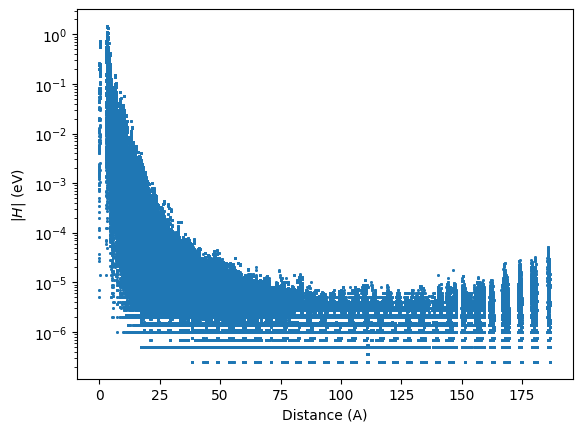

In [10]:
# plot hopping terms as a function of distance on a log scale
(dist, ham) = MBT.dist_hop()
fig, ax = plt.subplots()
ax.scatter(dist, np.abs(ham), s=1)
ax.set_xlabel("Distance (A)")
ax.set_ylabel(r"|$H$| (eV)")
ax.set_yscale('log')

In [11]:
# %lprun -f MBT.model -f TBModel._append_hops -f model._hoptable.extend MBT.model(zero_energy=E_F, min_hopping_norm=1e-4, max_distance=None, ignorable_imaginary_part=None)

# Wannier90 bands

In [13]:
k_frac_w90, w90_evals, k_dist_w90, k_nodes_w90, k_labels_w90 = MBT.bands_w90(return_k_dist=True, return_k_nodes=True)

In [14]:
w90_evals_shift = w90_evals - E_F

## PythTB bands

In [15]:
# get tb model in which some small terms are ignored
model = MBT.model(
    zero_energy=E_F, min_hopping_norm=1e-5,
    max_distance=None, ignorable_imaginary_part=None
    )

In [16]:
k_vec, k_dist, k_node_dist = model.k_path(k_nodes_w90, nk=400, report=False)

In [17]:
pythtb_evals = model.solve_ham(k_vec, use_tensorflow=True)

DEBUG pythtb.tbmodel: Initializing Hamiltonian...
DEBUG pythtb.tbmodel: Diagonalizing Hamiltonian...


## Quantum Espresso bands

In [20]:
k_frac_qe, qe_evals, k_dist_qe, k_cart_qe = MBT.bands_qe(return_kdist=True, return_k_cart=True)

# Bands comparison

Text(0.5, 1.0, 'MnBi$_2$Te$_4$ Bands')

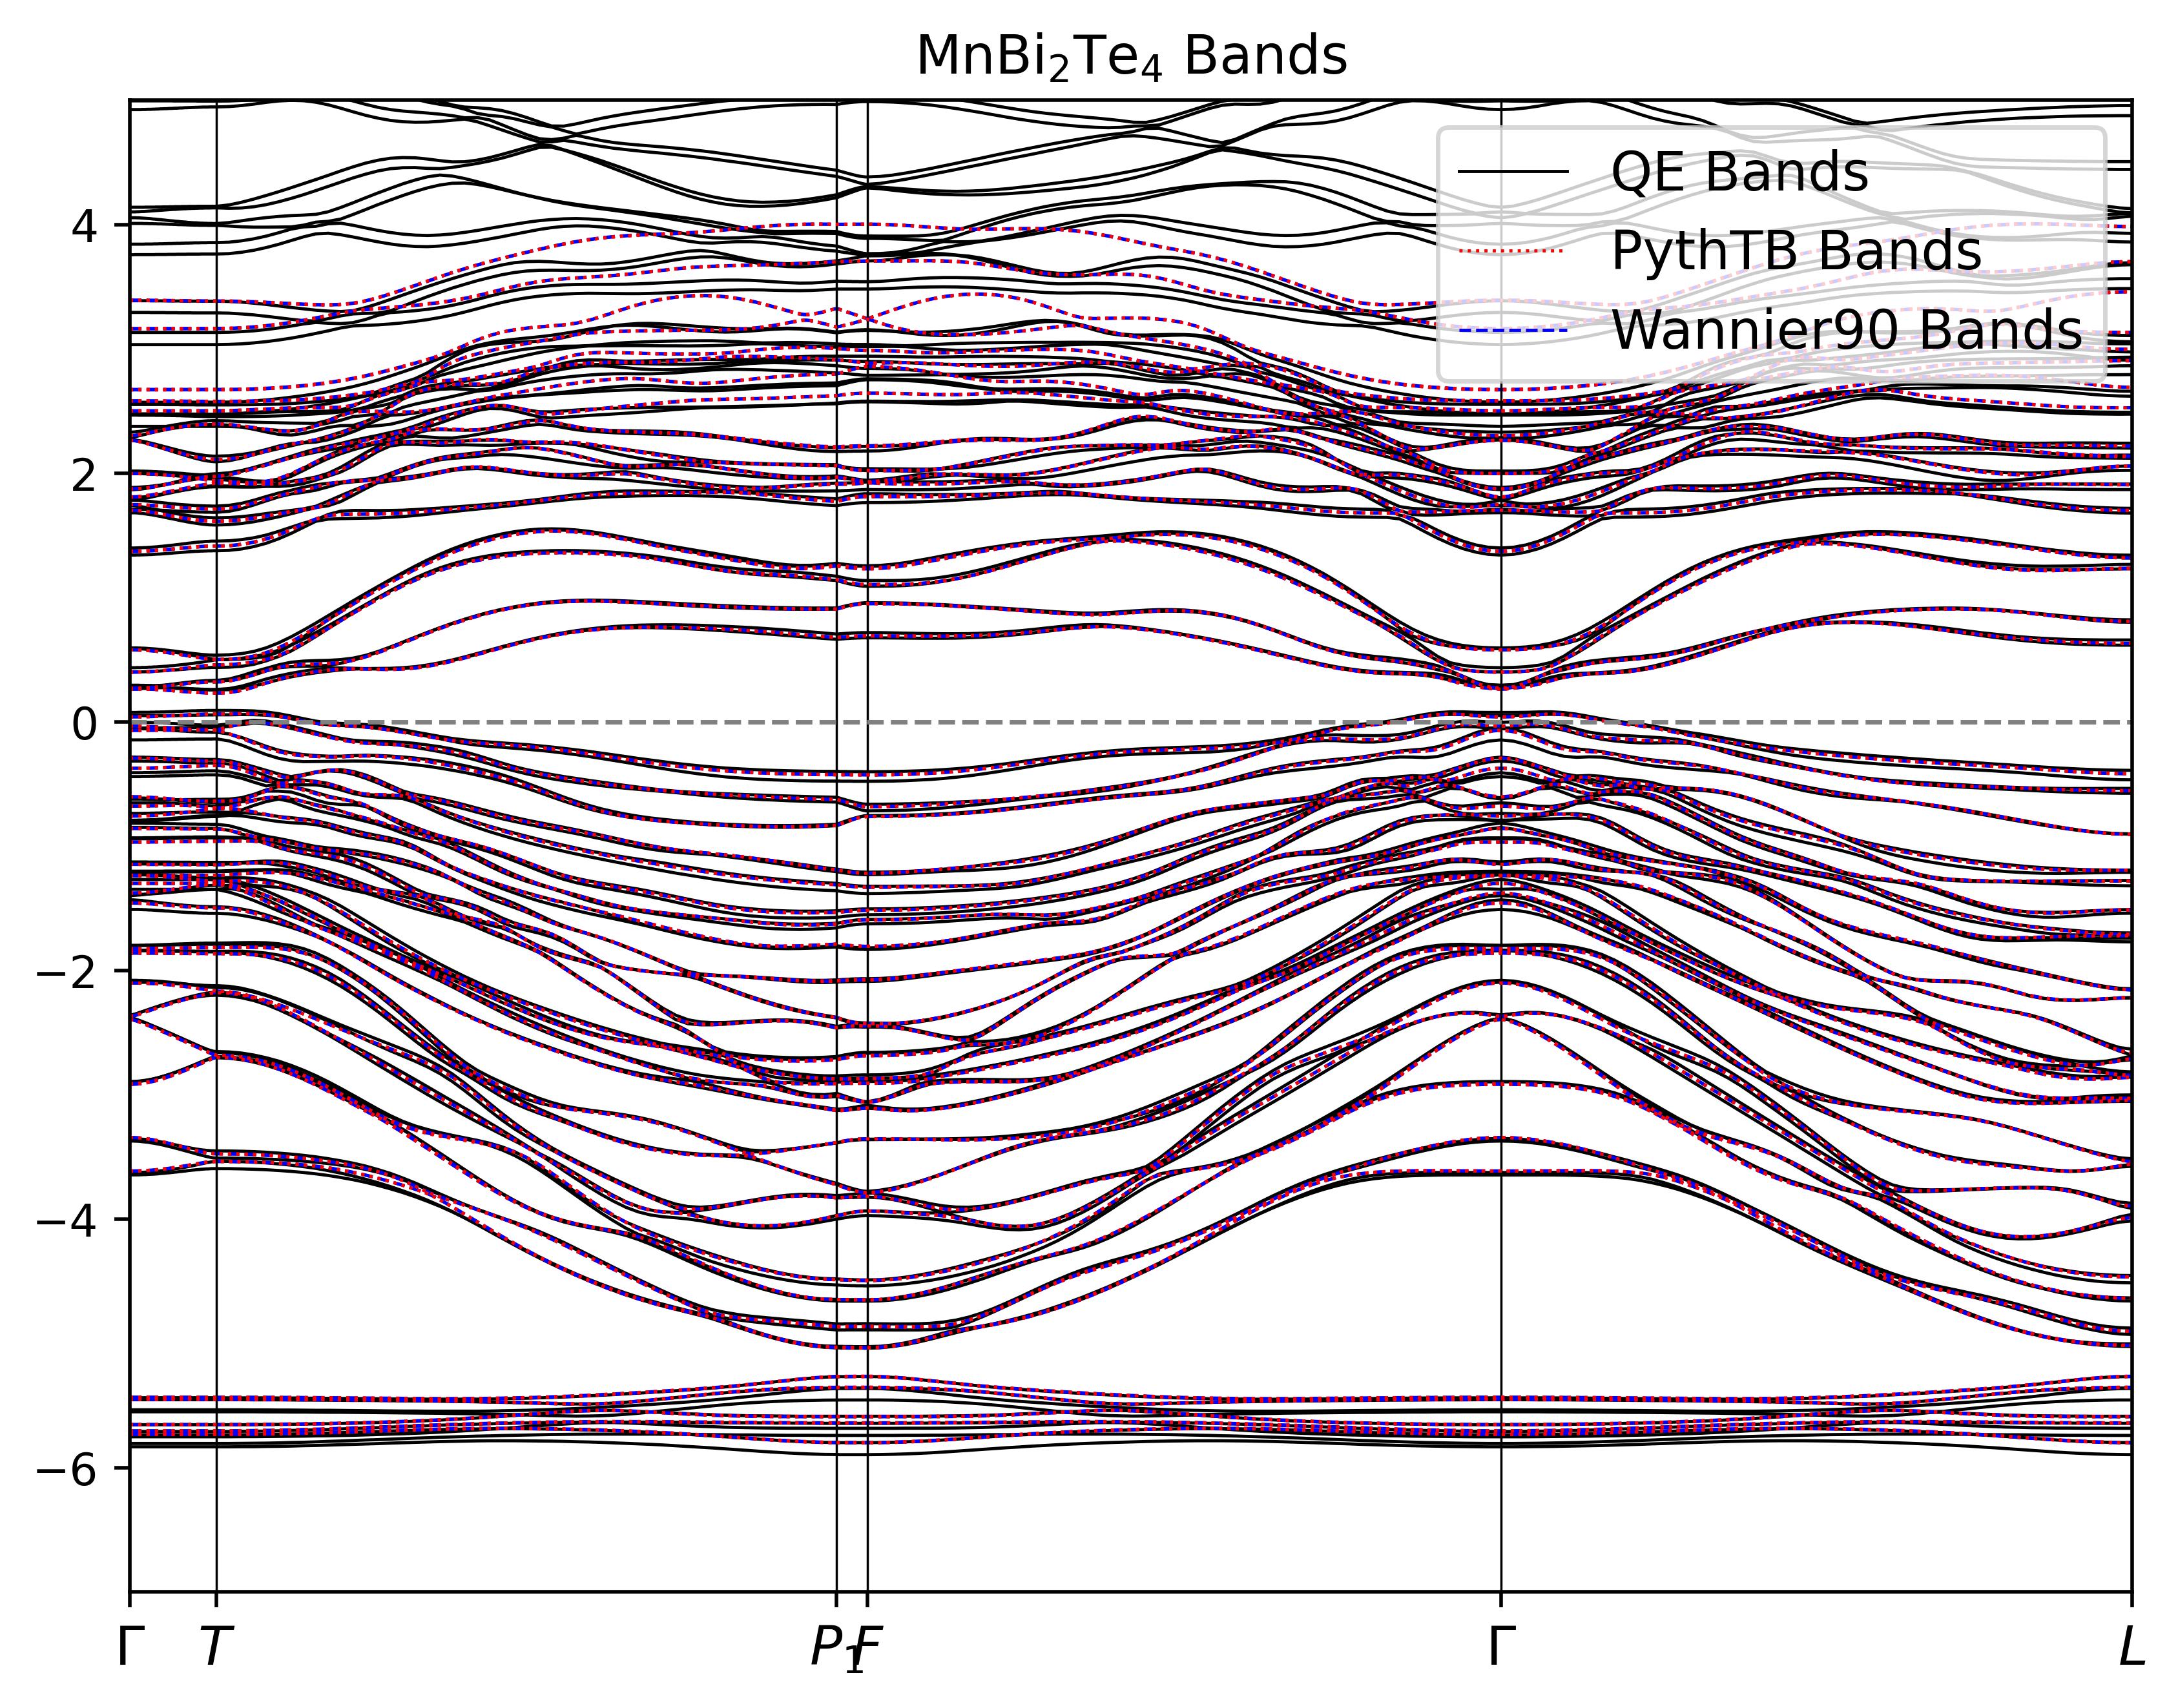

In [21]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=500)


for i in range(qe_evals.shape[1]):
    if i == 0:
        ax.plot(k_dist_qe, qe_evals[:, i] - E_F, c="k", ls="-", label='QE Bands', lw=0.7, zorder=0)
    else:
        ax.plot(k_dist_qe, qe_evals[:, i] - E_F, c="k", ls="-", lw=0.7, zorder=0)

for i in range(w90_evals.shape[1]):
    if i == 0:
        ax.plot(k_dist, pythtb_evals[:, i], c="r", ls=":", label='PythTB Bands', lw=0.7, zorder=2)
        ax.plot(k_dist_w90, w90_evals_shift[:, i], c="b", ls="--", label='Wannier90 Bands', lw=0.7, zorder=1)
    else:
        ax.plot(k_dist, pythtb_evals[:, i], c="r", ls=":", lw=0.7, zorder=2)
        ax.plot(k_dist_w90, w90_evals_shift[:, i], c="b", ls="--", lw=0.7, zorder=1)

ax.set_xticks(k_node_dist)
for n in range(len(k_node_dist)):
    ax.axvline(x=k_node_dist[n], linewidth=0.5, color="k", zorder=1)
ax.set_xticklabels(k_labels_w90, size=12)

ax.axhline(0, linestyle='--', color='gray', lw=1)
ax.set_xlim(k_dist[0], k_dist[-1])
ax.set_ylim(-7, 5)
ax.legend(loc="upper right", fontsize=12)
ax.set_title(r"MnBi$_2$Te$_4$ Bands")

## Axion Angle

In [15]:
k_nodes = [
    [0, 0, 0], 
    [0.5, 0.5, 0.5], 
    [0.6638635638, 0.1722728724, 0.6638635638],
    [0.5, 0, 0.5],
    [0, 0, 0],
    [0.5, 0, 0]
    ]

k_labels = [r"$\Gamma$", r"$T$", r"$P_1$", r"$F$", r"$\Gamma$", r"$L$"]

In [16]:
model.norb

92

DEBUG pythtb.tbmodel: Initializing Hamiltonian...
DEBUG pythtb.tbmodel: Diagonalizing Hamiltonian...


(<Figure size 640x480 with 2 Axes>, <Axes: ylabel='Energy $E(\\mathbf{{k}})$'>)

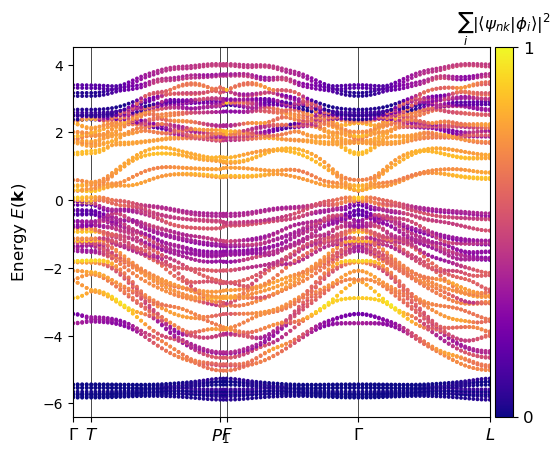

In [17]:
model.plot_bands(k_nodes=k_nodes, k_node_labels=k_labels, lw=1, proj_orb_idx=range(0, 46))

In [18]:
from modules.axion_old import axion_angle
from pythtb.models import fu_kane_mele
# from pythtb import *
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from itertools import product

ImportError: cannot import name 'Bloch' from 'pythtb' (/Users/treycole/Repos/pythtb/pythtb/__init__.py)

# from modules import Bloch, Model, K_mesh, Wannier
# from modules.bloch import finite_diff_coeffs, levi_civita
# from pythtb import Bloch, TBModel, KMesh, Wannier
# from pythtb.utils import finite_diff_coeffs, levi_civita
from modules.axion import axion_angle
from pythtb.models import fu_kane_mele
# from pythtb import *
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from itertools import product